In [1]:
# (1. current open minus previous close)

# 2. todays high - todays low
# 3. todays close - todays open


# should make data stationary. Use augmented dickey-fuller test to check for stationarity:
"""
from statsmodels.tsa.stattools import adfuller

# Assume `data` is a pandas DataFrame with 'Open' and 'Close' columns
data['Percent_Change'] = (data['Close'] - data['Open']) / data['Open']

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(data['Percent_Change'].dropna())

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")
"""

# 4. todays close - yesterday's close
# 5. todays open - todays low
# 6. todays open - todays high
# 7. todays close - todays low
# 8. todays close - todays high

# 4. month of year
# 5. week of year
# 6. day of year
# 7. day of month
# 8. day of week
# 9. hour of day (24h cycle)
# 10. Volume (normalized from 0 to 1)


# 11. Rolling window (SMA, EMA)
# 12. Fourier Transform
# 13. Wavelet Transform (discrete wavelet transform (adjust based on volatility: high volatility -> narrow the wavelet, low volatility -> widen the wavelet))
# ?? (Haar, Daubechies, Symlets, Coiflets, Biorthogonal, Reverse Biorthogonal, Discrete Meyer, Gaussian, Mexican Hat, Morlet, Complex Gaussian, Shannon, Frequency B-Spline, Complex Morlet, Generalized Morse, Complex Morlet, Paul, D4, D6, D8, D10, D12, D14, D16, D18, D20, D22, D24, D26, D28, D30, D32, D34, D36, D38, D40, D42, D44, D46, D48, D50, D52, D54, D56, D58, D60, D62, D64, D66, D68, D70, D72, D74, D76, D78, D80, D82, D84, D86, D88, D90, D92, D94, D96, D98, D100, D102, D104, D106, D108, D110, D112, D114, D116, D118, D120, D122, D124, D126, D128, D130, D132, D134, D136, D138, D140, D142, D144, D146, D148, D150, D152, D154, D156, D158, D160, D162, D164, D166, D168, D170, D172, D174, D176, D178, D180, D182, D184, D186, D188, D190, D192, D194, D196, D198, D200, D202, D204, D206, D208, D210, D212, D214, D216, D218, D220, D222, D224, D226, D228, D230, D232, D234, D236, D238, D240, D242, D244, D246, D248, D250, D252, D254, D256, D258, D260, D262, D264, D266, D268, D270, D272, D274, D276, D278, D280, D282, D284, D286, D288, D290, D292, D294, D)
# 14. Trading indicators (bullish or bearish divergence on the RSI, TD Sequential, Candlestick Patterns)


# Alle percentage price changes zwischen -1 und 1 normalisieren
# Volume normalisieren auf [0,1]


# Mit Github Copilot generiert:
# 14. Autocorrelation
# 15. Partial Autocorrelation
# 16. Cross-correlation
# 17. Cross-partial correlation
# 18. Cross-wavelet correlation
# 19. Cross-spectral density
# 20. Cross-wavelet coherence
# 21. Cross-wavelet phase
# 22. Cross-wavelet amplitude
# 23. Cross-wavelet phase difference
# 24. Cross-wavelet amplitude difference
# 25. Cross-wavelet phase lag
# 26. Cross-wavelet amplitude lag
# 27. Cross-wavelet coherence lag
# 28. Cross-wavelet phase difference lag
# 29. Cross-wavelet amplitude difference lag




## Getting the data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from configuration import stock_ticker, start_date, end_date

In [3]:
def adjust_to_three_sigma(feature_list):
    percentile_1st = np.percentile(feature_list, 0.3)
    percentile_99th = np.percentile(feature_list, 99.7)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    return feature_list_capped

def adjust_top_one_pct(feature_list):
    percentile_1st = np.percentile(feature_list, 1)
    percentile_99th = np.percentile(feature_list, 99)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    return feature_list_capped

In [4]:
stock_df = yf.download(stock_ticker, start=start_date, end=end_date)
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,22.700001,23.000000,22.520000,22.950001,14.269988,16355800
2009-01-05,22.785000,22.945000,22.590000,22.719999,14.126985,20237200
2009-01-06,22.850000,22.985001,22.230000,22.355000,13.900028,21307800
2009-01-07,22.110001,22.590000,22.110001,22.465000,13.968431,21581000
2009-01-08,22.420000,22.639999,22.280001,22.620001,14.064801,20087000


In [5]:
features_df = pd.DataFrame(index=stock_df.index)
features_df.head()

""
Date
2009-01-02
2009-01-05
2009-01-06
2009-01-07
2009-01-08


## Helper Functions

In [6]:
# Standardize with zero mean and 1 variance

def standardize_and_plot(feature_list):

    feature_list = np.array(feature_list)
    mean = np.mean(feature_list)
    std_dev = np.std(feature_list)
    feature_list_standardized = (feature_list - mean) / std_dev

    # Now t_close_t_open_standardized will have zero mean and unit variance
    print("Standardized mean:", np.mean(feature_list_standardized))
    print("Standardized variance:", np.var(feature_list_standardized))

    # Then you can plot the standardized histogram
    plt.hist(feature_list_standardized, bins='auto')
    plt.title('Standardized to zero mean and unit variance')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')
    plt.show()
    
    return feature_list_standardized

## Features

### 1. Current open minus previous close [%] | (capture price jumps between candles)


In [7]:
# 1. Current open minus previous close [%]

curr_open_prev_close = [(stock_df['Open'].iloc[i] - stock_df['Close'].iloc[i-1]) / stock_df['Close'].iloc[i-1] for i in range(1,len(stock_df))]
curr_open_prev_close = [0] + curr_open_prev_close
print(curr_open_prev_close)

[0, -0.007189582136911891, 0.005721878170956704, -0.01095946933131794, -0.002003119340676321, -0.00022109053623730384, -0.0031389998752953184, 0.0016007248012113518, -0.011812822634170623, -0.0011731402701453746, 0.012453895478000212, -0.001368644458991265, 0.012126876045027305, -0.015015049945304169, -0.010899754583674705, 0.002369632045336682, 0.005809900234537843, 0.015462684990359812, -0.003647967286492632, -0.0025258464357894466, -0.011938251911456164, 0.006155263049285002, 0.0006924926017591637, -0.004245290063631667, 0.000937009061000934, -0.005281275459600954, -0.007090594233523119, 0.007130585900758212, 0.03343835843974724, -0.004280212419946356, -0.019384230415030377, 0.0042253594277738985, 0.010074983648105442, -0.007621201435841505, 0.004201687780920975, 0.014967951195802002, -0.00278687279969447, 0.009440678214836877, -0.0026783689108579455, -0.009791866000559177, 0.00302350090033202, 0.01081633142261185, -0.01434683366201052, 0.007926104725286355, 0.009718697773524049, 0.

In [8]:
print(len(stock_df))
print(len(curr_open_prev_close))

3774
3774


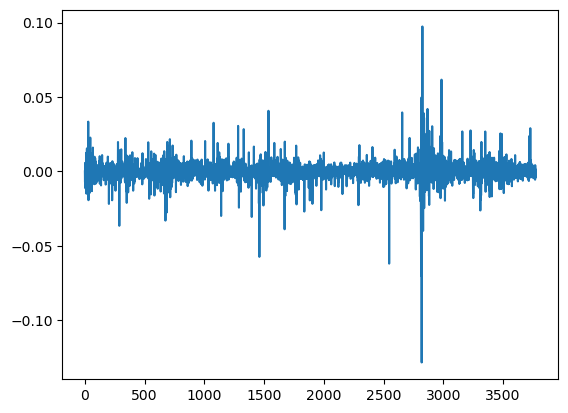

In [9]:
plt.plot(curr_open_prev_close)

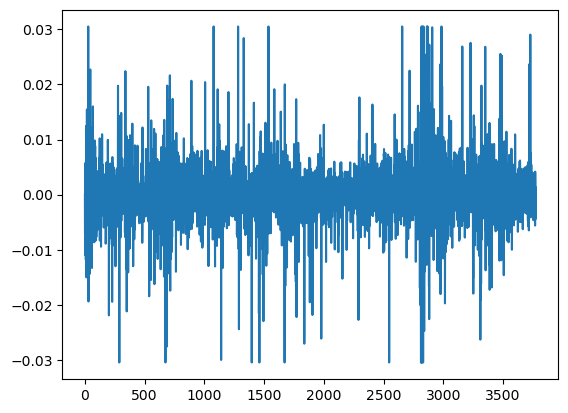

In [10]:
curr_open_prev_close_adjusted = adjust_to_three_sigma(curr_open_prev_close)
plt.plot(curr_open_prev_close_adjusted)

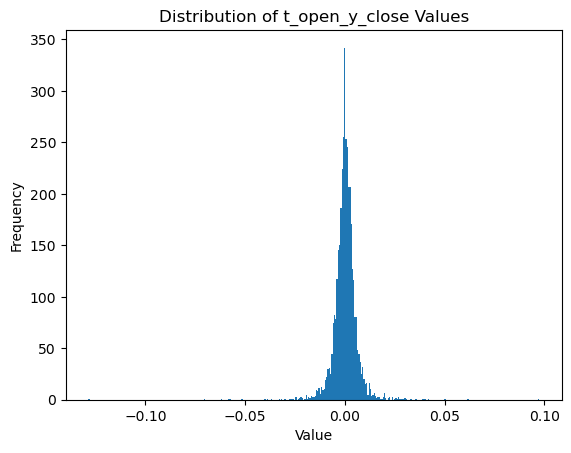

In [11]:
plt.hist(curr_open_prev_close, bins='auto')
plt.title('Distribution of t_open_y_close Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

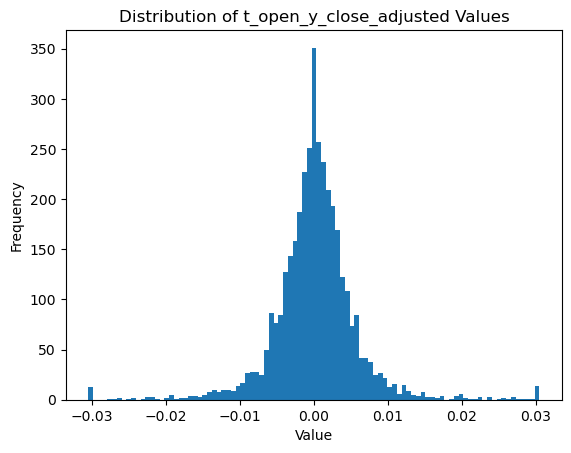

In [12]:
plt.hist(curr_open_prev_close_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Add log later
'''
t_open_y_close_log = []
for val in t_open_y_close:
    if val > 0:
        t_open_y_close_log.append(np.log(val))
    elif val == 0:
        t_open_y_close_log.append(0)
    else:
        t_open_y_close_log.append(-np.log(val))
plt.hist(np.log(t_open_y_close_log), bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
'''

"\nt_open_y_close_log = []\nfor val in t_open_y_close:\n    if val > 0:\n        t_open_y_close_log.append(np.log(val))\n    elif val == 0:\n        t_open_y_close_log.append(0)\n    else:\n        t_open_y_close_log.append(-np.log(val))\nplt.hist(np.log(t_open_y_close_log), bins='auto')\nplt.title('Distribution of t_open_y_close_adjusted Values')\nplt.xlabel('Value')\nplt.ylabel('Frequency')\nplt.show()\n"

In [14]:
features_df['curr_open_prev_close'] = curr_open_prev_close
features_df.head()

,curr_open_prev_close
Date,
2009-01-02,0.000000
2009-01-05,-0.007190
2009-01-06,0.005722
2009-01-07,-0.010959
2009-01-08,-0.002003


### 2. Today's high minus today's low [%] | (volatility at timestep t)


In [15]:
# 2. Today's high minus today's low [%] | (daily volatility)

t_high_t_low = [(stock_df['High'].iloc[i] - stock_df['Low'].iloc[i]) / stock_df['Low'].iloc[i] for i in range(len(stock_df))]
print(len(stock_df))
print(len(t_high_t_low))

3774
3774


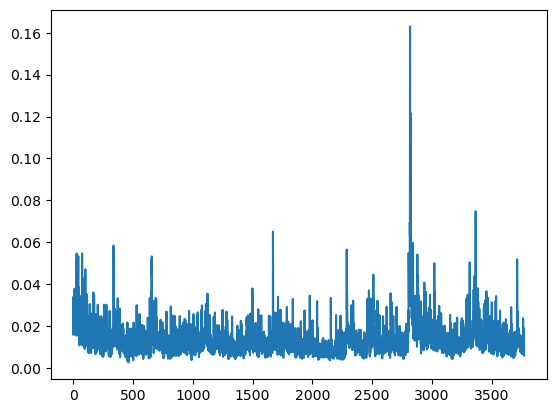

In [16]:
plt.plot(t_high_t_low)

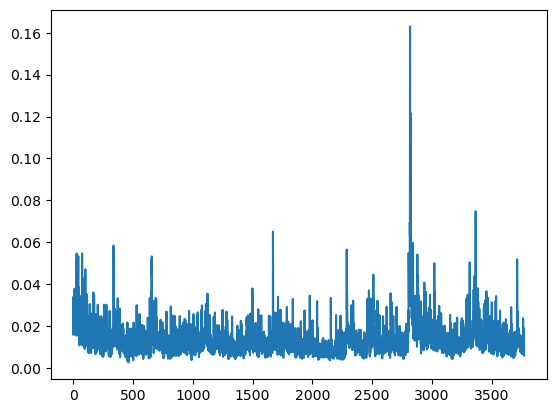

In [17]:
t_high_t_low_adjusted = adjust_to_three_sigma(t_high_t_low)
plt.plot(t_high_t_low_adjusted)

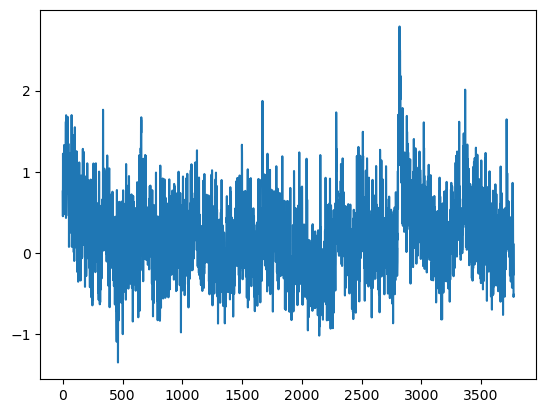

In [18]:
t_high_t_low_log = [np.log(val * 100) for val in t_high_t_low]
plt.plot(t_high_t_low_log)

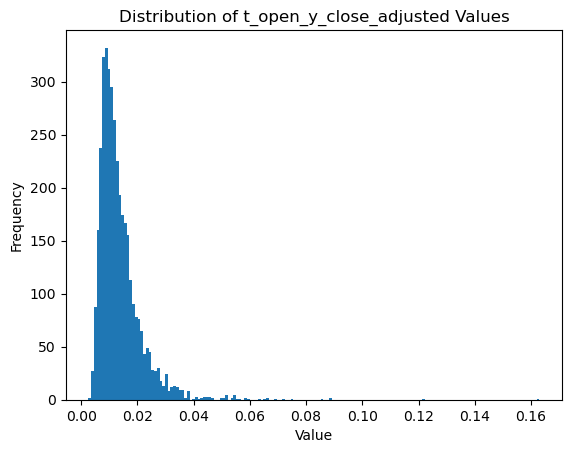

In [19]:
plt.hist(t_high_t_low, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

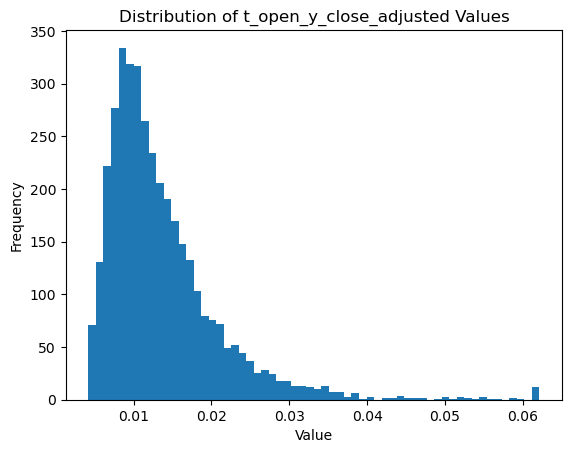

In [20]:
plt.hist(t_high_t_low_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Standardized mean: -4.518554758410812e-17
Standardized variance: 1.0


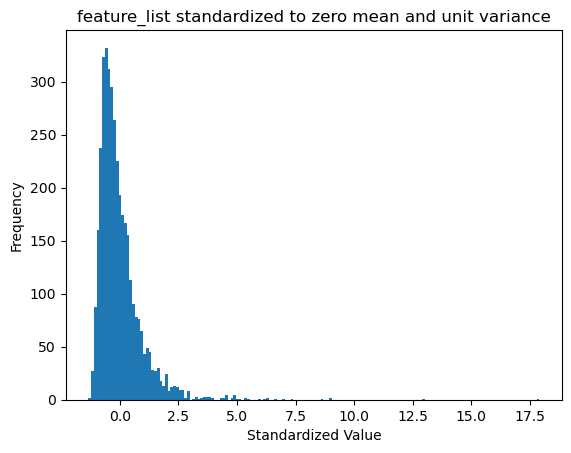

In [27]:
t_high_t_low_std = standardize_and_plot(t_high_t_low)

In [21]:
features_df['t_high_t_low'] = t_high_t_low
features_df.head()

,curr_open_prev_close,t_high_t_low
Date,,
2009-01-02,0.000000,0.021314
2009-01-05,-0.007190,0.015715
2009-01-06,0.005722,0.033963
2009-01-07,-0.010959,0.021710
2009-01-08,-0.002003,0.016158


### 3. Today's close minus today's open [%] | (daily movement)

In [22]:
# 3. Today's close minus today's open [%] | (daily movement)

t_close_t_open = [(stock_df['Close'].iloc[i] - stock_df['Open'].iloc[i]) * 100 / stock_df['Open'].iloc[i] for i in range(len(stock_df))]
print(t_close_t_open)
print(" ")
print(len(stock_df))
print(len(features_df))
print(len(t_close_t_open))


[1.1013215488880326, -0.2852777462932477, -2.166305605993866, 1.6056062073111061, 0.8920640600306078, -1.3928832069231654, -1.6419243303387188, 0.502285900765439, -2.0229909611844468, 1.8557691359894333, -0.13667738315600061, -2.0557280408313776, -0.25345761862697275, 1.1257025072867517, -1.0551013993901135, 1.7257672704559988, 0.11553385667314672, -0.31818043101917615, -0.34325291363865984, -1.657452644492421, 0.07107935239254094, 1.9294110466452206, -2.1914578585494366, 1.1132103088983096, 1.9190257514833173, -2.3314827531124744, -3.1897172247708525, 0.7568393071779453, 4.079713485388145, -0.7918603682736295, -0.9302361066951308, -0.23375053056216405, 0.44072981679188833, -0.3025391306077025, -2.1617859025567427, 0.79588048425223, -1.327432960069251, -3.9747503968774605, -0.26855618361881783, -1.878868039297511, -2.461691807159346, 1.2229287700288614, -3.345253775269325, 2.4901622811148796, -1.8490363492921602, -1.1859732728628913, 1.0469863355712046, 3.18342158474738, 0.340796941110

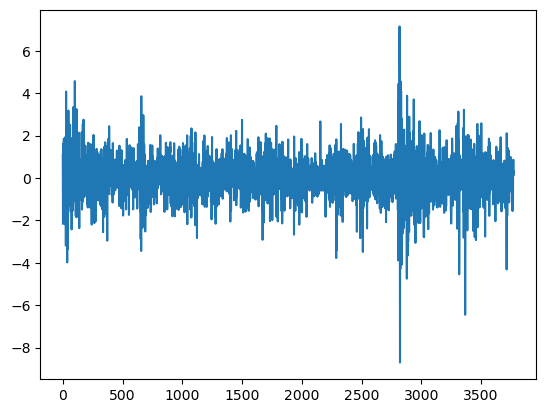

In [23]:
plt.plot(t_close_t_open)

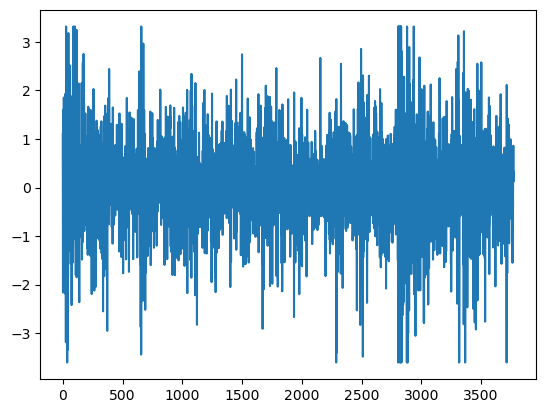

In [24]:
t_close_t_open_adjusted = adjust_to_three_sigma(t_close_t_open)
plt.plot(t_close_t_open_adjusted)

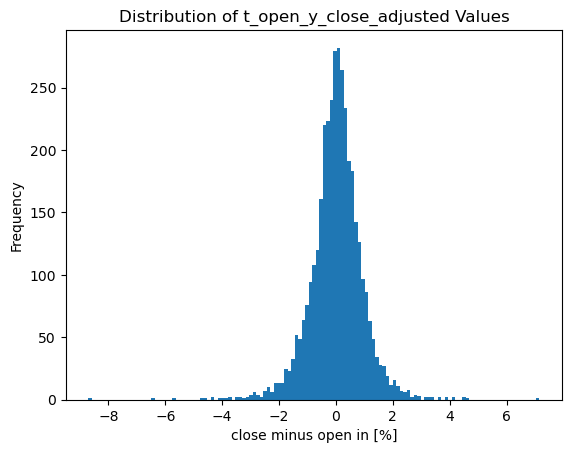

In [25]:
plt.hist(t_close_t_open, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('close minus open in [%]')
plt.ylabel('Frequency')
plt.show()

Standardized mean: 0.0
Standardized variance: 1.0


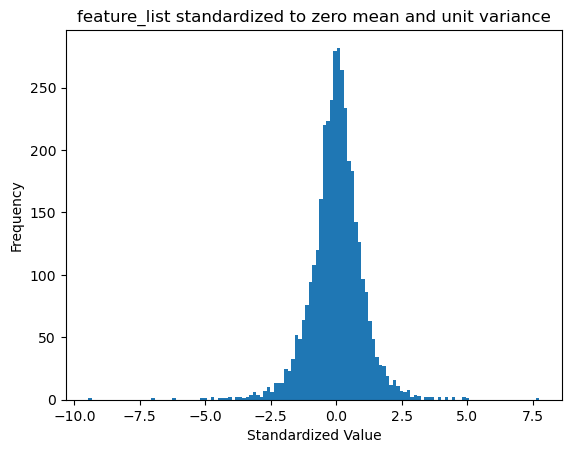

In [26]:
# Standardize with zero mean and 1 variance

t_close_t_open_std = standardize_and_plot(t_close_t_open)

In [ ]:
plt.hist(t_close_t_open_adjusted, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
features_df['t_close_t_open'] = t_close_t_open
features_df.head()

### 4. Month of year

In [ ]:
# 4. Month of year

def month_of_year(month):
    radians = (month - 1) * (np.pi / 6)
    return [np.cos(radians), np.sin(radians)]

features_df['month_of_year'] = features_df.index.month.map(month_of_year)
features_df


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['month_of_year']]
y_coordinates = [val[1] for val in features_df['month_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "month of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 5. Week of year

In [ ]:
# 5. Week of year

def week_of_year(week):
    radians = (week - 1) * (2 * np.pi / 52)
    return [np.cos(radians), np.sin(radians)]

features_df['week_of_year'] = features_df.index.isocalendar().week.map(week_of_year)
features_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['week_of_year']]
y_coordinates = [val[1] for val in features_df['week_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "week of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Test for the week number
'''
test_df = features_df.copy()
test_df['week_number'] = test_df.index.isocalendar().week
test_df
'''

### 6. Day of year (dont use for now because of leap year)

In [ ]:
# 6. Day of year - leap year? => If we use this feature, remove the 29th of February from the data set

'''
def day_of_year(day):
    radians = (day - 1) * (2 * np.pi / 365.25)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_year'] = features_df.index.day.map(day_of_year)
features_df
'''

### 7. Day of month

In [ ]:
# 7. Day of month

def day_of_month(day):
    radians = (day - 1) * (2 * np.pi / 31)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_month'] = features_df.index.day.map(day_of_month)
features_df

In [ ]:
for day in set(features_df.index.day):
    print(day)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_month']]
y_coordinates = [val[1] for val in features_df['day_of_month']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_month" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 8. Day of week

In [ ]:
# 8. Day of week

def day_of_week(day):
    radians = (day - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_week'] = features_df.index.isocalendar().day.map(day_of_week)
features_df

In [ ]:
print(features_df.index.isocalendar().day)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_week']]
y_coordinates = [val[1] for val in features_df['day_of_week']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_week" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 9. Hour of day

In [ ]:
# 9. Hour of day - CURRENTLY: daily resolution on public data - implement later with Energy data

'''
def hour_of_day(hour):
    radians = (hour - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['hour_of_day'] = features_df.index.hour.map(hour_of_day)
features_df
'''

### 10. Volume

In [ ]:
volume = stock_df['Volume']
plt.plot(volume)

In [ ]:
volume_adjusted = adjust_to_three_sigma(volume)
plt.plot(volume_adjusted)

In [ ]:
# Use log for volume
log_volume = [np.log(value) for value in stock_df['Volume']]
plt.plot(log_volume)

In [ ]:
# Remove spikes:    Werte, die über 99th percentile hinausgehen, werden auf den 99th percentile Wert gesetzt
#                   Werte, die unter den 99th percentile hinausgehen, werden auf den 99th percentile Wert gesetzt

# Or with three sigma (99.7%)

### Create tensor from features